
# Grade: 100 points

# Assignment 01: Linear Regression

## Instructions

#### Follow These Steps before submitting your assignment 

1. Complete the notebook.

2. Make sure all plots have axis labels.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Submit one completed notebook for the group to OWL by the deadline.

6. Please note, a random seed of 42 needs to be set to ensure the reproducability of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

7. Make sure to reference all external code and documentation used.


# Q1 - Data Loading and Exploration

`Dataset_Assignment1.csv` lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

Age: Player age in years
Nationality: Players nationality
Overall: Player overall performance score (higher better)
Potential: Player potential score (higher better)
Club: Player home soccer club
Value: Player value i.e, the amount of money a club should pay in order to purchase the player (higher better)
Wage: Player stipend (higher better)
Preferred Foot: Player preferred foot to play
International Reputation: Player international fame (higher better)
Week Foot: Performance score of player weak foot (higher better)
Skill Moves: Player move skill score (higher better)
Body Type: Player body type
Position: Position player holds on the pitch
Height: Player height in CM
Weight: Player weight in kg

1. Load the dataset.
2. Display basic statistics and inspect for missing data.
3. Visualize the distribution of numerical columns.
4. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

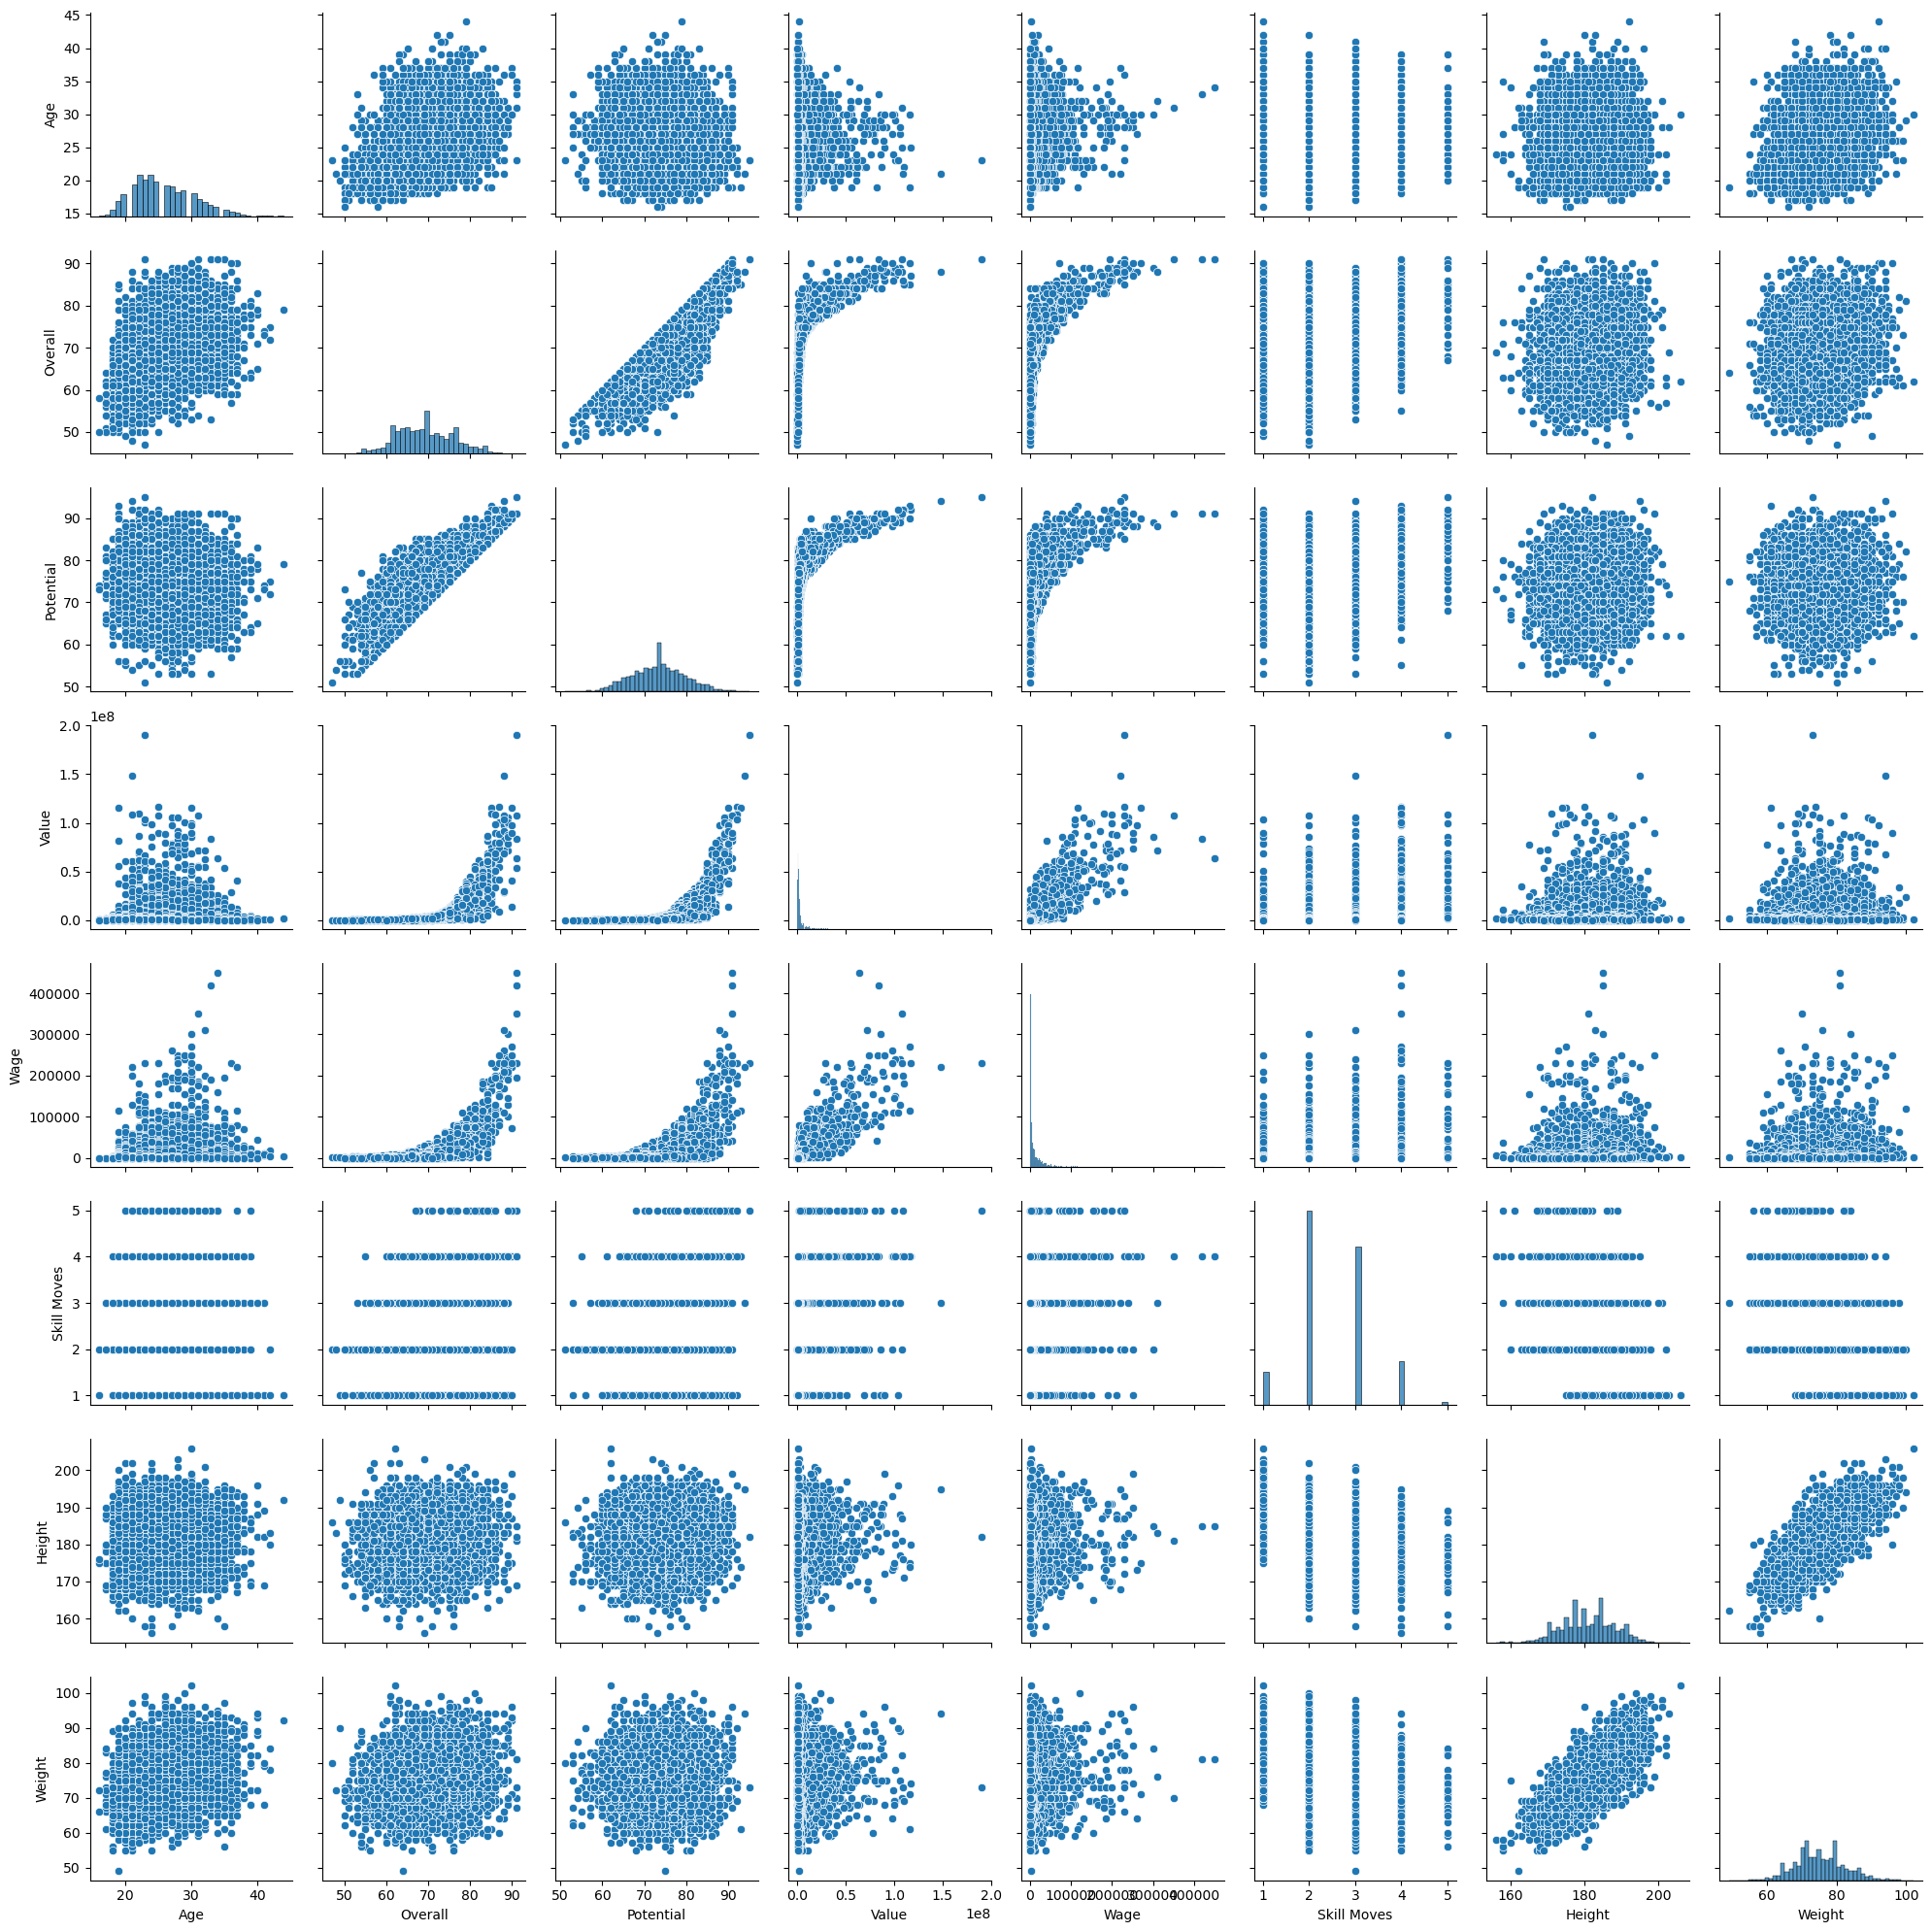

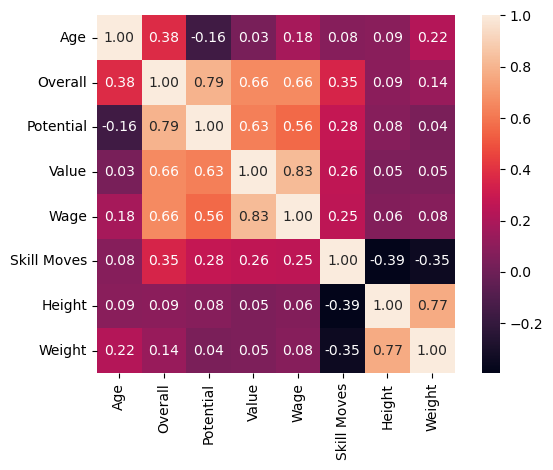

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from CSV file 
df = pd.read_csv('Dataset_Assignment1.csv', header=None, sep=',', skiprows=1)

# Assign column names to DataFrame
df.columns = ['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Body Type', 'Position', 'Height', 'Weight']

# Display the first 5 rows of the DataFrame
df.head()


# Define a list of column names to include in the pair plot for numeric quantities
cols = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Skill Moves', 'Height', 'Weight']

# Create a pair plot that will display scatter plots for all pairs of columns
sns.pairplot(df[cols], height=2.5)

# Adjust the layout of the plots to minimize overlap and improve aesthetics
plt.tight_layout()

# Display the generated pair plot in a window
plt.show()


**Answer to 4**: 
It is important to explore and visualize data before building a model as it allows you to determine and understand the structures and relationships underlying the data, giving you the oppertunity to highlight important ones relavent to modeling. It also allows you to spot outliers, data trends, or missing values that may affect the overall accuracy of your model if not taken into account. This process is called EDA (Exploratory Data Analysis).

# Q2 - Feature extraction

1. Plot the joint distribution between `Weight` and `Height`.
2. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. 

<Figure size 1500x900 with 0 Axes>

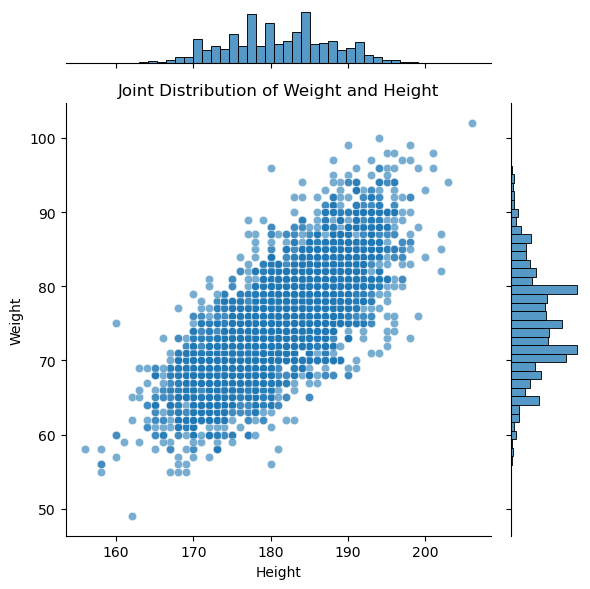

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,BMI
0,27,Portugal,86,87,Manchester United,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,21.534908
1,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,23.323418
2,31,Belgium,91,91,Manchester City,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,21.366869
3,25,Italy,86,89,Inter,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,22.985398
4,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,Right,4.0,4.0,3.0,Normal,Middle,23.939481


In [8]:
# Plot the joint distribution between Weight and Height then display it
plt.figure(figsize=(15, 9))
sns.jointplot(x='Height', y='Weight', data=df, kind='scatter', alpha=0.6)
plt.title('Joint Distribution of Weight and Height')
plt.tight_layout()
plt.show()

# Convert height from cm to m
df['Height_m'] = df['Height'] / 100  

# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2) 

# Drop the Weight and Height columns
df = df.drop(columns=['Weight', 'Height', 'Height_m'])


# Display first few rows of data to show changes
df.head()

# Q3 - Correlation and Feature Selection

1. Compute correlation between numerical features.
2. Visualize correlations using a heatmap to identify highly correlated features.
3. Choose the most correlated feature with the target variable (`Value`) for simple linear regression.
4. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

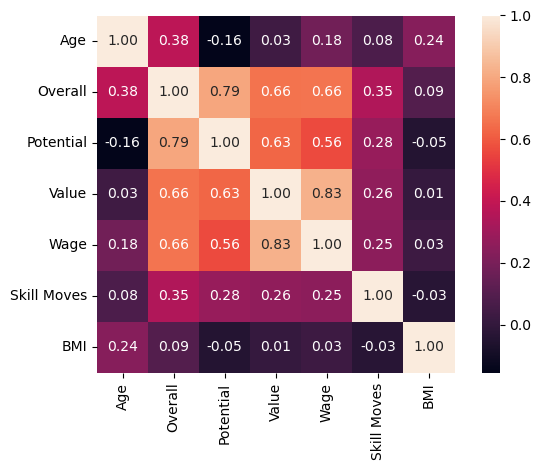

In [11]:
# adjust cols list to represent new variables
cols.remove('Weight')
cols.remove('Height')
cols.append('BMI')

# Calculate the correlation matrix using numpy
cm = np.corrcoef(df[cols].values.T)

# Create a heatmap using Seaborn to visualize the correlation matrix
hm = sns.heatmap(cm,
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f',  
                 annot_kws={'size': 10},  
                 yticklabels=cols, 
                 xticklabels=cols)  

# Adjust the layout of the plot to avoid overlap and improve aesthetics
plt.tight_layout()

# Display the generated heatmap
plt.show()

**Answer to 4**: 

# Q4 - Data Normalization & Simple Linear Regression

1. Select one highly correlated numerical feature and build a simple linear regression model to predict the target variable.
2. Split the data into 80% training and 20% test sets (use the random seed of 42). 
3. Normalize the dataset.
4. Rebuild the simple linear regression model with normalized data.
5. Compare the normalized and non-normalized data visually. 
6. Compare performance of the normalized and non-normalized models visually and using R² and RMSE.
7. **Discussion Question:** Why might normalizing data improve model performance? In which situations might normalization not be beneficial?
8. Visualize the relationship between the selected feature and the predicted target variable.
9. **Discussion Question:** What could cause a simple linear regression model to perform poorly, even if the correlation is high?

**Answer to 7**: 

**Answer to 9**: 

# Q 5 - Multiple Linear Regression

1. Select numerical features with correlation above certain thresholds (e.g., 0.3, 0.6, and 0.8).
2. Build three different multiple linear regression models using different sets of features based on correlation thresholds.
3. Evaluate and compare these models using R² and RMSE.
4. **Discussion Question:** How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?

**Answer to 4**: 

# Q6 - Model Evaluation and Comparison

1. Compare all models (simple and multiple regression models) by printing there R² and RMSE values.
2. **Discussion Question:** Which model performs the best and why?
3. **Discussion Question:** If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?
4. **Discussion Question:** Discuss next steps or potential improvements to the models.

**Answer to 2**: 

**Answer to 3**: 

**Answer to 4**: 